# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get right columns

In [20]:
df_orig = pd.read_csv("/content/Multi_cities_Deh_Dataset.csv")
df_orig

,DATES,HOUR,PARTICIPANT,HV_PARTICIPANT,GEN_AUX,PUMPING,MV_PARTICIPANT,DS_ALL,MV_ALL,LV_PARTICIPANT,...,Thessaloniki_temp_min,Thessaloniki_temp_max,Thessaloniki_feels_like,Thessaloniki_humidity,Thessaloniki_wind_speed,Thessaloniki_wind_deg,Thessaloniki_clouds_all,Thessaloniki_weather_main,Thessaloniki_weather_description,Thessaloniki_pressure
0,2010-10-01,1,PPC,837.827,71.044,0.0,0.000,3768.259,117.232,3481.182,...,14.37,19.40,14.88,42.0,2.60,360.0,20.0,Clouds,few clouds,1015.0
1,2010-10-01,2,PPC,864.991,68.930,0.0,0.000,3376.254,112.264,3112.151,...,12.79,19.00,14.58,42.0,1.50,0.0,40.0,Clouds,scattered clouds,1015.0
2,2010-10-01,3,PPC,889.561,67.857,0.0,0.000,3179.700,108.810,2928.034,...,12.08,17.00,13.68,48.0,1.00,0.0,75.0,Clouds,broken clouds,1015.0
3,2010-10-01,4,PPC,877.570,67.319,0.0,0.000,3109.583,106.678,2863.211,...,11.92,16.40,12.83,54.0,1.95,359.0,40.0,Clouds,scattered clouds,1016.0
4,2010-10-01,5,PPC,857.101,77.885,0.0,0.000,3093.072,106.501,2847.637,...,11.80,16.00,13.69,58.0,0.50,0.0,75.0,Clouds,broken clouds,1016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88939,2020-11-22,20,PPC,747.564,22.192,0.0,281.277,0.000,0.000,3230.909,...,5.71,11.67,6.74,65.0,2.60,90.0,20.0,Clouds,few clouds,1030.0
88940,2020-11-22,21,PPC,747.723,23.684,0.0,278.481,0.000,0.000,3041.600,...,5.71,11.11,6.03,70.0,3.10,100.0,20.0,Clouds,few clouds,1031.0
88941,2020-11-22,22,PPC,725.925,24.065,0.0,281.064,0.000,0.000,2707.773,...,5.71,10.56,5.19,75.0,3.60,100.0,20.0,Clouds,few clouds,1031.0
88942,2020-11-22,23,PPC,733.932,24.199,0.0,279.782,0.000,0.000,2423.200,...,4.89,10.00,5.29,75.0,3.10,100.0,20.0,Clouds,few clouds,1031.0


In [21]:
total_cols = df_orig.shape[1]
cols_per_city = 11
common_cols = 17
total_cities = (total_cols-common_cols)/cols_per_city

cols = df_orig.columns
common_df = df_orig.iloc[:, :common_cols]
common_df["Timestamp"] = pd.to_datetime(df_orig["DATES"], format='%Y-%m-%d') + pd.to_timedelta(df_orig["HOUR"]-1, 'hours')
common_df.set_index("Timestamp", inplace=True)
common_df.drop(['DATES', 'HOUR', 'PARTICIPANT', 'Day', 'Month'], axis=1, inplace=True)

common_df

,HV_PARTICIPANT,GEN_AUX,PUMPING,MV_PARTICIPANT,DS_ALL,MV_ALL,LV_PARTICIPANT,TOTAL_CONS,TOTAL_SYSTEM,Weekday,Weekend,Holiday
Timestamp,,,,,,,,,,,,
2010-10-01 00:00:00,837.827,71.044,0.0,0.000,3768.259,117.232,3481.182,4390.054,0.000,4,0,0
2010-10-01 01:00:00,864.991,68.930,0.0,0.000,3376.254,112.264,3112.151,4046.071,0.000,4,0,0
2010-10-01 02:00:00,889.561,67.857,0.0,0.000,3179.700,108.810,2928.034,3885.451,0.000,4,0,0
2010-10-01 03:00:00,877.570,67.319,0.0,0.000,3109.583,106.678,2863.211,3808.100,0.000,4,0,0
2010-10-01 04:00:00,857.101,77.885,0.0,0.000,3093.072,106.501,2847.637,3782.623,0.000,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-22 19:00:00,747.564,22.192,0.0,281.277,0.000,0.000,3230.909,4281.942,6221.377,6,1,0
2020-11-22 20:00:00,747.723,23.684,0.0,278.481,0.000,0.000,3041.600,4091.488,5940.066,6,1,0
2020-11-22 21:00:00,725.925,24.065,0.0,281.064,0.000,0.000,2707.773,3738.827,5433.386,6,1,0


In [22]:
for i in range(int(total_cities)):
  temp_df = pd.DataFrame()
  start_col = common_cols + i*cols_per_city
  end_col = start_col + cols_per_city
  city_data_df = df_orig.iloc[:, start_col:end_col].copy()
  city_name = city_data_df.columns[0].split('_')[0]
  city_data_df[f'Location'] = city_name
  city_data_df['Timestamp'] = common_df.index
  city_data_df.set_index('Timestamp', inplace=True)
  if i != 0:
    city_data_df.columns = city_cols
  temp_df = pd.concat([common_df, city_data_df], axis=1)
  temp_df.set_index(['Location', temp_df.index], inplace=True)
  if i == 0:
    df = temp_df.copy()
    city_cols = city_data_df.columns
  else:
    df = pd.concat([df, temp_df.copy()], axis=0)

df.columns = df.columns.str.lstrip('Agrinio_')
df

HV_PARTICIPANT  GEN_AUX  PUMPING  \
Location     Timestamp                                               
Agrinio      2010-10-01 00:00:00         837.827   71.044      0.0   
             2010-10-01 01:00:00         864.991   68.930      0.0   
             2010-10-01 02:00:00         889.561   67.857      0.0   
             2010-10-01 03:00:00         877.570   67.319      0.0   
             2010-10-01 04:00:00         857.101   77.885      0.0   
...                                          ...      ...      ...   
Thessaloniki 2020-11-22 19:00:00         747.564   22.192      0.0   
             2020-11-22 20:00:00         747.723   23.684      0.0   
             2020-11-22 21:00:00         725.925   24.065      0.0   
             2020-11-22 22:00:00         733.932   24.199      0.0   
             2020-11-22 23:00:00         743.038   25.631      0.0   

                                  MV_PARTICIPANT    DS_ALL   MV_ALL  \
Location     Timestamp                                                
Agrinio      2010-10-01 00:00:00           0.000  3768.259  117.232   
             2010-10-01 01:00:00           0.000  3376.254  112.264   
             2010-10-01 02:00:00           0.000  3179.700  108.810   
             2010-10-01 03:00:00           0.000  3109.583  106.678   
             2010-10-01 04:00:00           0.000  3093.072  106.501   
...                                          ...       ...      ...   
Thessaloniki 2020-11-22 19:00:00         281.277     0.000    0.000   
             2020-11-22 20:00:00         278.481     0.000    0.000   
             2020-11-22 21:00:00         281.064     0.000    0.000   
             2020-11-22 22:00:00         279.782     0.000    0.000   
             2020-11-22 23:00:00         266.552     0.000    0.000   

                                  LV_PARTICIPANT  TOTAL_CONS  TOTAL_SYSTEM  \
Location     Timestamp                                                       
Agrinio      2010-10-01 00:00:00        3481.182    4390.054         0.000   
             2010-10-01 01:00:00        3112.151    4046.071         0.000   
             2010-10-01 02:00:00        2928.034    3885.451         0.000   
             2010-10-01 03:00:00        2863.211    3808.100         0.000   
             2010-10-01 04:00:00        2847.637    3782.623         0.000   
...                                          ...         ...           ...   
Thessaloniki 2020-11-22 19:00:00        3230.909    4281.942      6221.377   
             2020-11-22 20:00:00        3041.600    4091.488      5940.066   
             2020-11-22 21:00:00        2707.773    3738.827      5433.386   
             2020-11-22 22:00:00        2423.200    3461.113      5026.398   
             2020-11-22 23:00:00        2072.236    3107.457      4516.807   

                                  Weekday  ...  temp_min  temp_max  \
Location     Timestamp                     ...                       
Agrinio      2010-10-01 00:00:00        4  ...     15.69     19.00   
             2010-10-01 01:00:00        4  ...     14.68     19.00   
             2010-10-01 02:00:00        4  ...     14.19     18.00   
             2010-10-01 03:00:00        4  ...     12.78     18.00   
             2010-10-01 04:00:00        4  ...     12.53     17.15   
...                                   ...  ...       ...       ...   
Thessaloniki 2020-11-22 19:00:00        6  ...      5.71     11.67   
             2020-11-22 20:00:00        6  ...      5.71     11.11   
             2020-11-22 21:00:00        6  ...      5.71     10.56   
             2020-11-22 22:00:00        6  ...      4.89     10.00   
             2020-11-22 23:00:00        6  ...      4.89      9.44   

                                  feels_like  humidity  wind_speed  wind_deg  \
Location     Timestamp                                                         
Agrinio      2010-10-01 00:00:00       18.78      82.0        0.33     321.0   
             2010-10-01 01:00:00 

In [23]:
# final_df = df.loc["Athens"][["TOTAL_CONS", "Weekday",	"Weekend", "Holiday", "temp", "humidity"]].copy()
final_df = df[["TOTAL_CONS",	"Weekend", "Holiday", "temp", "humidity"]].copy()
final_df

TOTAL_CONS  Weekend  Holiday   temp  \
Location     Timestamp                                                  
Agrinio      2010-10-01 00:00:00    4390.054        0        0  17.58   
             2010-10-01 01:00:00    4046.071        0        0  16.82   
             2010-10-01 02:00:00    3885.451        0        0  16.07   
             2010-10-01 03:00:00    3808.100        0        0  15.67   
             2010-10-01 04:00:00    3782.623        0        0  14.70   
...                                      ...      ...      ...    ...   
Thessaloniki 2020-11-22 19:00:00    4281.942        1        0   9.94   
             2020-11-22 20:00:00    4091.488        1        0   9.47   
             2020-11-22 21:00:00    3738.827        1        0   8.89   
             2020-11-22 22:00:00    3461.113        1        0   8.68   
             2020-11-22 23:00:00    3107.457        1        0   8.27   

                                  humidity  
Location     Timestamp                      
Agrinio      2010-10-01 00:00:00      82.0  
             2010-10-01 01:00:00      93.0  
             2010-10-01 02:00:00      93.0  
             2010-10-01 03:00:00      87.0  
             2010-10-01 04:00:00      93.0  
...                                    ...  
Thessaloniki 2020-11-22 19:00:00      65.0  
             2020-11-22 20:00:00      70.0  
             2020-11-22 21:00:00      75.0  
             2020-11-22 22:00:00      75.0  
             2020-11-22 23:00:00      80.0  

[1334160 rows x 5 columns]

## Plot correlation matrices

In [16]:
for region in final_df.index.levels[0]:
  df = final_df.loc[region]
  print(f"********* {region} *********")
  print(final_df.loc[region].corr()['TOTAL_CONS'][['temp', 'humidity']])

********* Agrinio *********
temp        0.188206
humidity   -0.303274
Name: TOTAL_CONS, dtype: float64
********* Alexandroupoli *********
temp        0.098449
humidity   -0.323250
Name: TOTAL_CONS, dtype: float64
********* Arta *********
temp        0.179014
humidity   -0.340089
Name: TOTAL_CONS, dtype: float64
********* Athens *********
temp        0.152699
humidity   -0.249724
Name: TOTAL_CONS, dtype: float64
********* Chalcis *********
temp        0.156531
humidity   -0.273213
Name: TOTAL_CONS, dtype: float64
********* Corinth *********
temp        0.153645
humidity   -0.329265
Name: TOTAL_CONS, dtype: float64
********* Ioannina *********
temp        0.210558
humidity   -0.292190
Name: TOTAL_CONS, dtype: float64
********* Kalamata *********
temp        0.168208
humidity   -0.301824
Name: TOTAL_CONS, dtype: float64
********* Kozani *********
temp        0.141884
humidity   -0.274376
Name: TOTAL_CONS, dtype: float64
********* Lamia *********
temp        0.178770
humidity   -0.272728
N

In [25]:
final_df.loc['Agrinio'].index

DatetimeIndex(['2010-10-01 00:00:00', '2010-10-01 01:00:00',
               '2010-10-01 02:00:00', '2010-10-01 03:00:00',
               '2010-10-01 04:00:00', '2010-10-01 05:00:00',
               '2010-10-01 06:00:00', '2010-10-01 07:00:00',
               '2010-10-01 08:00:00', '2010-10-01 09:00:00',
               ...
               '2020-11-22 14:00:00', '2020-11-22 15:00:00',
               '2020-11-22 16:00:00', '2020-11-22 17:00:00',
               '2020-11-22 18:00:00', '2020-11-22 19:00:00',
               '2020-11-22 20:00:00', '2020-11-22 21:00:00',
               '2020-11-22 22:00:00', '2020-11-22 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=88944, freq=None)

In [26]:
pd.DataFrame(columns=final_df.loc['Agrinio'][['TOTAL_CONS', 'Weekend', 'Holiday']])

ValueError: ignored

In [29]:
df = pd.DataFrame()
df.index=final_df.loc['Agrinio'].index
df['TOTAL_CONS'] = final_df.loc['Agrinio']['TOTAL_CONS']
df['Weekend'] = final_df.loc['Agrinio']['Weekend']
df['Holiday'] = final_df.loc['Agrinio']['Holiday']
df['temp'] = final_df.loc['Patras']['temp']
df['humidity'] = final_df.loc['Arta']['humidity']
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['dayofyear'] = df.index.dayofyear
df.head()

,TOTAL_CONS,Weekend,Holiday,temp,humidity,hour,weekday,dayofyear
Timestamp,,,,,,,,
2010-10-01 00:00:00,4390.054,0,0,16.12,79.0,0,4,274
2010-10-01 01:00:00,4046.071,0,0,15.19,77.0,1,4,274
2010-10-01 02:00:00,3885.451,0,0,14.65,82.0,2,4,274
2010-10-01 03:00:00,3808.100,0,0,14.03,71.0,3,4,274
2010-10-01 04:00:00,3782.623,0,0,13.29,77.0,4,4,274


In [30]:
df.corr().style.background_gradient(cmap='coolwarm')

,TOTAL_CONS,Weekend,Holiday,temp,humidity,hour,weekday,dayofyear
TOTAL_CONS,1.000000,-0.113112,-0.096831,0.208971,-0.340089,0.465101,-0.086178,-0.052847
Weekend,-0.113112,1.000000,0.018321,0.004864,0.015178,0.000000,0.790601,0.001976
Holiday,-0.096831,0.018321,1.000000,-0.076725,0.002682,0.000000,-0.009465,-0.036804
temp,0.208971,0.004864,-0.076725,1.000000,-0.349898,0.241087,-0.000843,0.263483
humidity,-0.340089,0.015178,0.002682,-0.349898,1.000000,-0.267018,0.009912,-0.020797
hour,0.465101,0.000000,0.000000,0.241087,-0.267018,1.000000,-0.000000,0.000000
weekday,-0.086178,0.790601,-0.009465,-0.000843,0.009912,-0.000000,1.000000,0.001423
dayofyear,-0.052847,0.001976,-0.036804,0.263483,-0.020797,0.000000,0.001423,1.000000


In [31]:
df.to_csv('FINAL_DATASET_2.csv')

# Continue ...

In [ ]:
final_df = df.loc["Athens"]

final_df["cos_hour"] = np.cos(2 * np.pi * final_df.index.hour / 24)
final_df["sin_hour"] = np.sin(2 * np.pi * final_df.index.hour / 24)
final_df["cos_weekday"] = np.cos(2 * np.pi * final_df.index.weekday / 7)
final_df["sin_weekday"] = np.sin(2 * np.pi * final_df.index.weekday / 7)
final_df.drop("Weekday", axis=1, inplace=True)
final_df["cos_dayOfYear"] = np.cos(2 * np.pi * final_df.index.dayofyear / 365)
final_df["sin_dayOfYear"] = np.sin(2 * np.pi * final_df.index.dayofyear / 365)

<ipython-input-6-bad6f137b9be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["cos_hour"] = np.cos(2 * np.pi * final_df.index.hour / 24)
<ipython-input-6-bad6f137b9be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["sin_hour"] = np.sin(2 * np.pi * final_df.index.hour / 24)
<ipython-input-6-bad6f137b9be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
final_df.to_csv("FINAL_DATASET_2.csv")

In [ ]:
# 13.12 + 0.6215T – 11.37 (V^0.16) + 0.3965T (V^0.16)
final_df['WindChill'] = 13.12 + 0.6215 * final_df['temp'] - 11.37 * ((3*final_df['wind_speed']/50)**0.16) + 0.3965 * final_df['temp'] * ((3*final_df['wind_speed']/50)**0.16)

<ipython-input-12-1668689a27e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['WindChill'] = 13.12 + 0.6215 * final_df['temp'] - 11.37 * ((3*final_df['wind_speed']/50)**0.16) + 0.3965 * final_df['temp'] * ((3*final_df['wind_speed']/50)**0.16)


In [ ]:
corr = final_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,HV_PARTICIPANT,GEN_AUX,PUMPING,MV_PARTICIPANT,DS_ALL,MV_ALL,LV_PARTICIPANT,TOTAL_CONS,TOTAL_SYSTEM,Weekend,Holiday,temp,temp_min,temp_max,feels_like,humidity,wind_speed,wind_deg,clouds_all,pressure,cos_hour,sin_hour,cos_weekday,sin_weekday,cos_dayOfYear,sin_dayOfYear,WindChill
HV_PARTICIPANT,1.000000,-0.012552,0.155988,0.097431,-0.455668,0.023370,-0.419527,-0.336153,-0.152573,0.333201,-0.108835,-0.174289,-0.183444,-0.160925,-0.124878,0.229696,-0.244433,-0.093123,0.015213,0.043604,0.348427,0.381562,0.002403,-0.265254,-0.018658,0.056969,-0.163938
GEN_AUX,-0.012552,1.000000,0.053291,-0.749225,-0.131378,-0.753438,0.370242,0.225801,-0.181804,0.059858,0.025383,-0.040944,-0.028987,-0.032726,-0.049153,0.039636,0.059848,0.091752,-0.006178,-0.016137,0.056650,0.067090,0.029775,-0.048998,-0.001583,0.046645,-0.042657
PUMPING,0.155988,0.053291,1.000000,-0.094775,-0.240880,-0.113055,-0.159874,-0.139228,-0.177026,0.007540,0.028684,-0.177038,-0.174399,-0.168529,-0.179590,0.128344,0.020228,0.038195,0.066666,0.035204,0.118533,0.215192,0.014925,-0.004777,0.134472,0.025569,-0.179446
MV_PARTICIPANT,0.097431,-0.749225,-0.094775,1.000000,0.116550,0.957756,-0.476720,-0.259140,0.318259,-0.068528,-0.044892,0.120003,0.114060,0.109226,0.129333,-0.090638,-0.074939,-0.116283,-0.005670,-0.022128,-0.099876,-0.035009,-0.027102,0.055302,-0.091127,-0.005863,0.123526
DS_ALL,-0.455668,-0.131378,-0.240880,0.116550,1.000000,0.183976,0.756207,0.844146,0.391260,-0.186439,-0.102556,0.237327,0.254587,0.218715,0.184578,-0.322387,0.228253,0.035435,-0.056808,-0.040014,-0.361636,-0.500728,-0.081972,0.152486,-0.019401,-0.045919,0.228411
MV_ALL,0.023370,-0.753438,-0.113055,0.957756,0.183976,1.000000,-0.474191,-0.278535,0.313990,-0.123906,-0.070527,0.160583,0.150839,0.149351,0.168134,-0.120417,-0.060945,-0.105304,-0.020924,-0.028070,-0.145680,-0.044300,-0.049453,0.101458,-0.116606,-0.028315,0.163597
LV_PARTICIPANT,-0.419527,0.370242,-0.159874,-0.476720,0.756207,-0.474191,1.000000,0.965947,0.197602,-0.113267,-0.063168,0.126364,0.151032,0.115998,0.074587,-0.220809,0.242087,0.100255,-0.035790,-0.008256,-0.257352,-0.419346,-0.051493,0.092750,0.053564,-0.039014,0.116606
TOTAL_CONS,-0.336153,0.225801,-0.139228,-0.259140,0.844146,-0.278535,0.965947,1.000000,0.294872,-0.113112,-0.096831,0.152699,0.178880,0.139564,0.100737,-0.249724,0.232867,0.074577,-0.037902,-0.009883,-0.281772,-0.440211,-0.066111,0.093302,0.039621,-0.038049,0.143450
TOTAL_SYSTEM,-0.152573,-0.181804,-0.177026,0.318259,0.391260,0.313990,0.197602,0.294872,1.000000,-0.075299,-0.057759,0.145722,0.135617,0.146370,0.126402,-0.187920,0.036140,-0.058270,-0.006087,-0.033637,-0.162419,-0.225100,-0.039059,0.062611,-0.050173,0.023714,0.145437
Weekend,0.333201,0.059858,0.007540,-0.068528,-0.186439,-0.123906,-0.113267,-0.113112,-0.075299,1.000000,0.018321,0.003678,0.002647,0.005572,0.003227,-0.003457,-0.009293,-0.004234,-0.018233,0.015813,-0.000000,-0.000000,0.179587,-0.785658,0.000482,-0.000700,0.004342


# Visualize the Data

<Axes: xlabel='Timestamp'>

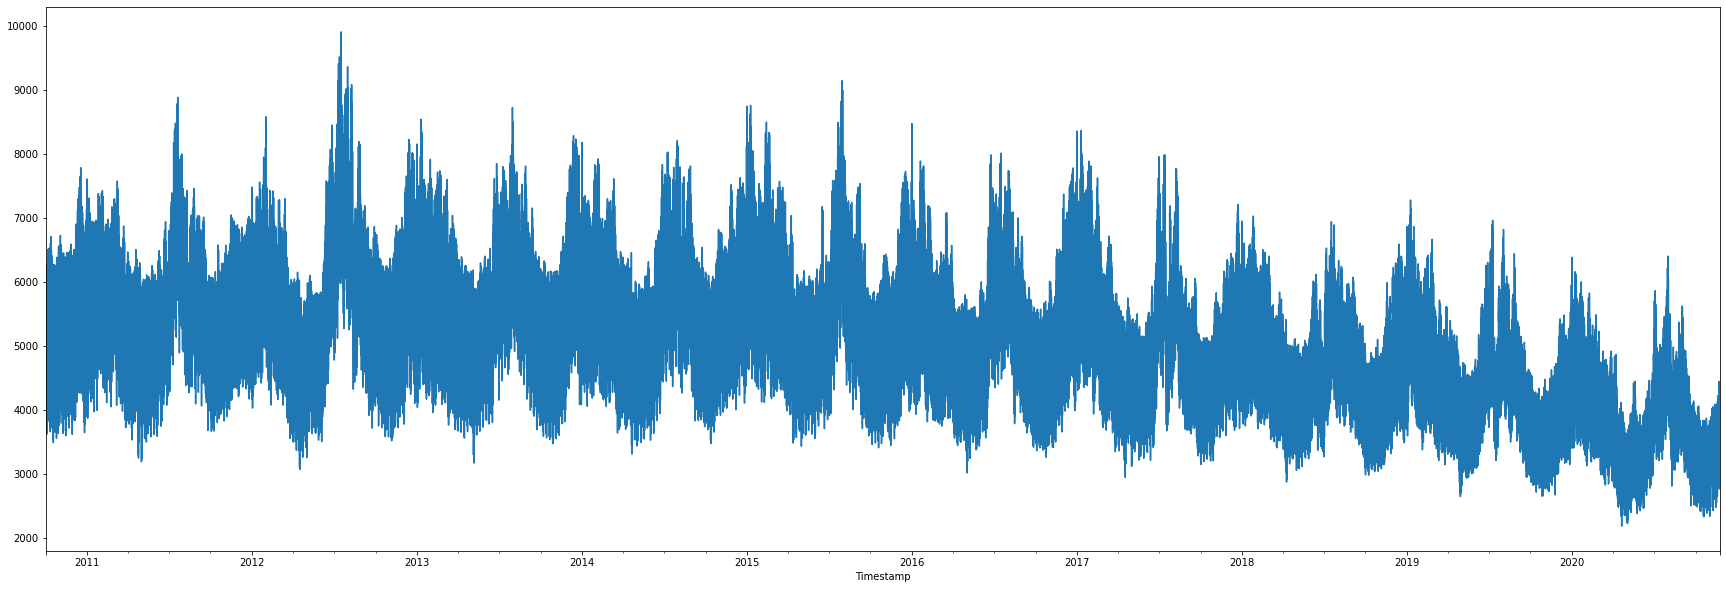

In [ ]:
final_df["TOTAL_CONS"].plot(figsize=(30, 10))

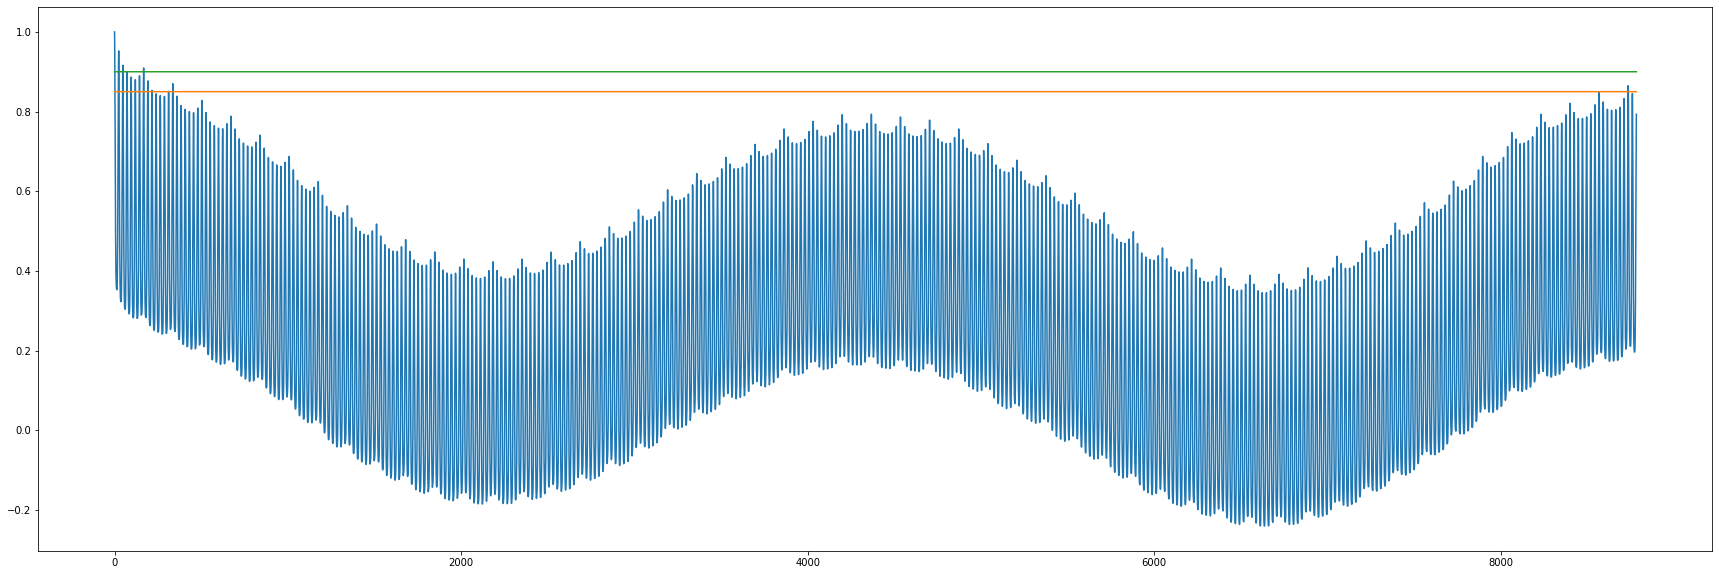

In [ ]:
autocorr_list = []
days = 50
lags = 24 * days
for lag in range(lags):
  autocorr_list.append(final_df["TOTAL_CONS"].autocorr(lag=lag))

autocorr = np.array(autocorr_list)
plt.figure(figsize=(30, 10))
plt.plot(autocorr)
plt.plot(0.85 * np.ones(lags))
plt.plot(0.9 * np.ones(lags))
plt.show()

In [ ]:
corr = final_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,TOTAL_CONS,Weekend,Holiday,temp,humidity,cos_hour,sin_hour,cos_weekday,sin_weekday,cos_dayOfYear,sin_dayOfYear
TOTAL_CONS,1.000000,-0.113112,-0.096831,0.152699,-0.249724,-0.281772,-0.440211,-0.066111,0.093302,0.039621,-0.038049
Weekend,-0.113112,1.000000,0.018321,0.003678,-0.003457,-0.000000,-0.000000,0.179587,-0.785658,0.000482,-0.000700
Holiday,-0.096831,0.018321,1.000000,-0.073146,0.015235,0.000000,-0.000000,0.061087,-0.045622,0.032134,0.106406
temp,0.152699,0.003678,-0.073146,1.000000,-0.620554,-0.216417,-0.246748,0.005540,-0.002607,-0.778004,-0.356172
humidity,-0.249724,-0.003457,0.015235,-0.620554,1.000000,0.266903,0.300232,0.013235,0.008465,0.496206,0.136734
cos_hour,-0.281772,-0.000000,0.000000,-0.216417,0.266903,1.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
sin_hour,-0.440211,-0.000000,-0.000000,-0.246748,0.300232,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
cos_weekday,-0.066111,0.179587,0.061087,0.005540,0.013235,-0.000000,0.000000,1.000000,0.000065,-0.000197,0.000161
sin_weekday,0.093302,-0.785658,-0.045622,-0.002607,0.008465,0.000000,0.000000,0.000065,1.000000,-0.000441,0.000925
cos_dayOfYear,0.039621,0.000482,0.032134,-0.778004,0.496206,-0.000000,0.000000,-0.000197,-0.000441,1.000000,-0.009815
